Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?


Answer: The fundamental idea behind ensemble techniques is to combine multiple weak or base models (like decision trees) to create a stronger and more accurate overall model. The goal is to reduce variance, bias, or improve predictions.

Bagging (Bootstrap Aggregating): Trains multiple models in parallel on different random subsets of data (with replacement).Each model is independent, and final prediction is the average (regression) or majority vote (classification).It ‘s goal was to  Reduce variance and prevent overfitting. Example: Random Forest.

Boosting: Trains models sequentially, each new model focuses on correcting the errors made by the previous one.It Combines models using weighted votes. It’s goal Reduce bias and build a strong learner from weak ones. Example: AdaBoost, Gradient Boosting, XGBoost.



Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

Answer: A Random Forest reduces overfitting by creating an ensemble of multiple decision trees trained on different random subsets of data and features. Averaging their results smooths out noise and variance, preventing overfitting.

Key Hyperparameters:

1. n_estimators: Number of trees in the forest. More trees → better averaging → less overfitting (up to a limit).


2. max_features: Number of features considered at each split. Smaller values → more randomness → less correlation among trees → reduces overfitting.


Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

Answer: Stacking (Stacked Generalization) combines predictions from multiple models (base learners) using a meta-model that learns how to best combine them.

Difference are-

Bagging/Boosting: Combine base learners directly (e.g., averaging or weighted sum).

Stacking: Uses another model (meta-learner) to learn optimal combinations of predictions.


Example Use Case: Predicting house prices using:

Base models: Linear Regression, Random Forest, Gradient Boosting

Meta model: Logistic Regression or another regressor that learns from their outputs.




Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

Answer: OOB (Out-of-Bag) Score is the average prediction accuracy computed using samples not included in the bootstrap sample for each tree. It is useful because it Provides an internal validation score,Avoids the need for a separate validation/test set and Helps estimate model performance during training.



Question 5:Compare AdaBoost and Gradient Boosting in terms of:
How they handle errors from weak learners Weight adjustment mechanism Typical use cases.


Answer: Error Handling	Focuses on misclassified samples by increasing their weights it Minimizes overall loss function (like MSE, log loss) using gradient descent.
Weight Adjustment adjusts sample weights after each iteration and its new model on the residual errors (gradients)
Typical Use Cases Simple and fast, for binary classification More flexible, supports regression and classification (used in XGBoost, LightGBM)




Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

Answer: CatBoost (Categorical Boosting) handles categorical features natively using a statistical method called Target Encoding with Permutation.
Converts categorical values into numerical values using the average target value (but in a way that avoids data leakage).Applies ordered boosting to prevent overfitting.No need for one-hot encoding → faster and more accurate on categorical-heavy datasets.



In [ ]:
#Question 7:KNN Classifier Assignment: Wine Dataset Analysis with Optimization

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV



X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)



param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)


0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

{'metric': 'manhattan', 'n_neighbors': 1}


In [ ]:
#Question 8 PCA + KNN with Variance Analysis and Visualization.

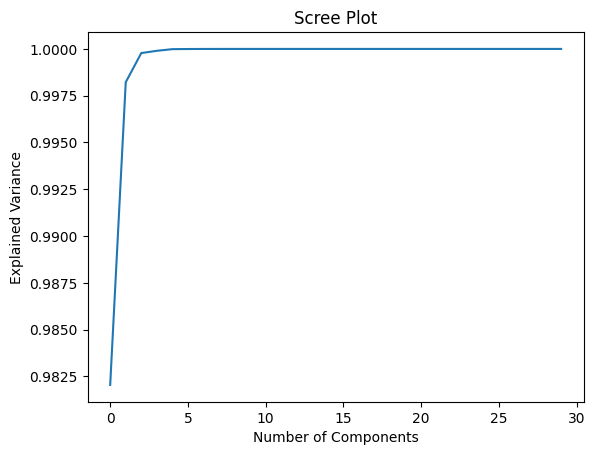

IndexError: index 1 is out of bounds for axis 1 with size 1

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



X, y = load_breast_cancer(return_X_y=True)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()



pca = PCA(0.95)
X_pca = pca.fit_transform(X)



plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First Two Principal Components')
plt.show()



In [ ]:
#Question 9: KNN Regressor with Distance Metrics and K-Value Analysis


3103.699882259301
3675.2741541435325


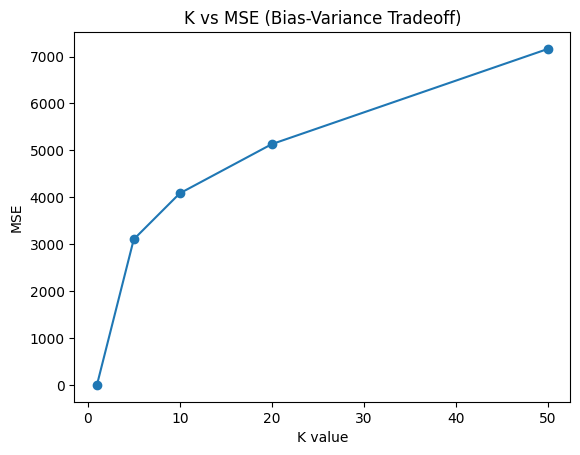

In [4]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)



knn_eu = KNeighborsRegressor(n_neighbors=5, metric='euclidean').fit(X, y)
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan').fit(X, y)

y_pred_eu = knn_eu.predict(X)
y_pred_man = knn_man.predict(X)

print(mean_squared_error(y, y_pred_eu))
print(mean_squared_error(y, y_pred_man))



mse = []
for k in [1, 5, 10, 20, 50]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    mse.append(mean_squared_error(y, knn.predict(X)))

plt.plot([1,5,10,20,50], mse, marker='o')
plt.xlabel('K value')
plt.ylabel('MSE')
plt.title('K vs MSE (Bias-Variance Tradeoff)')
plt.show()




